In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
df=pd.read_csv('sch_lat_lon_df.csv') #import data file

In [126]:
df.columns # examine the features

Index(['Unnamed: 0', 'time_period', 'time_identifier', 'geographic_level',
       'country_code', 'country_name', 'region_code', 'region_name',
       'old_la_code', 'new_la_code', 'la_name', 'URN', 'estab', 'school_name',
       'laestab', 'open_date', 'sex_of_school_description',
       'phase_type_grouping', 'type_of_establishment', 'middle_school',
       'all_through', 'hospital_school', 'denomination', 'admissions_policy',
       'district_administrative_code', 'district_administrative_name',
       'parlc_code', 'parlc_name', 'ward_code', 'ward_name', 'urban_rural',
       'school_postcode', 'LSOA11', 'Total pupils', 'SEN support', 'EHC plan',
       'EHC_Primary_need_spld', 'EHC_Primary_need_mld', 'EHC_Primary_need_sld',
       'EHC_Primary_need_pmld', 'EHC_Primary_need_semh',
       'EHC_Primary_need_slcn', 'EHC_Primary_need_hi', 'EHC_Primary_need_vi',
       'EHC_Primary_need_msi', 'EHC_Primary_need_pd', 'EHC_Primary_need_asd',
       'EHC_Primary_need_oth', 'EHC_Primary_need

In [127]:
df.shape#check the shape

(24304, 79)

In [129]:
df['phase_type_grouping'].unique() # look at home many different types of schools are represented

array(['State-funded primary', 'Independent school',
       'State-funded nursery', 'Pupil referral unit',
       'State-funded special school', 'State-funded secondary',
       'Non-maintained special school'], dtype=object)

In [130]:
len(df['type_of_establishment'].unique())# look at home many different types of schools are represented

26

Remove special types of schools likely to distort the data

In [131]:
df=df[~df['type_of_establishment'].str.contains('special')]
df=df[~df['type_of_establishment'].str.contains('Pupil referral unit')]
df=df[~df['type_of_establishment'].str.contains('alternative')]
df=df[~df['type_of_establishment'].str.contains('University technical college')]
df=df[~df['type_of_establishment'].str.contains('Studio schools')]

Further EDA looking at numbers of different types of schools

In [132]:
for est_type in df['type_of_establishment'].unique():
    print(est_type, len(df[df['type_of_establishment'].str.contains(est_type)]))

Voluntary aided school 2883
Other independent school 1798
Local authority nursery school 388
Community school 6350
Free schools 398
Academy sponsor led 2269
Academy converter 5726
Academy 16-19 converter 29
Foundation school 730
Free schools 16 to 19 26
Voluntary controlled school 1742
City technology college 3
Academy 16 to 19 sponsor led 1


Filter out more of the specialist types of schools

In [133]:
df=df[~df['type_of_establishment'].str.contains('Academy 16-19 converter')]
df=df[~df['type_of_establishment'].str.contains('City technology college')]
df=df[~df['type_of_establishment'].str.contains('Academy 16 to 19 sponsor led')]
df=df[~df['type_of_establishment'].str.contains('Free schools 16 to 19')]

Text(0.5, 1.0, 'Types of schools considered were reduced from 26 to 9 \n')

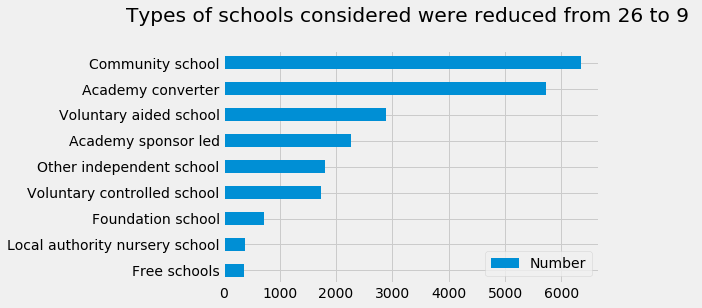

In [134]:
plt.style.use('fivethirtyeight')
schooltypes = []
schoolnumbers = []
for est_type in df['type_of_establishment'].unique():
    schooltypes.append(est_type)
    schoolnumbers.append(len(df[df['type_of_establishment'].str.contains(est_type)]))

data_tuples = list(zip(schooltypes,schoolnumbers))
df_for_plot = pd.DataFrame(data_tuples, index=schooltypes, columns=['est_type', 'Number'])
df_for_plot= df_for_plot.sort_values(by=['Number'])
df_for_plot.plot(kind='barh')
plt.title('Types of schools considered were reduced from 26 to 9 \n')

Reduce down to core features

In [135]:
df=df[['SEN support', 'EHC plan','URN', 'latitude', 'longitude', 'type_of_establishment', 'phase_type_grouping']]

One hot encode the categorical features

In [136]:
df_dummies=pd.get_dummies(df[['phase_type_grouping','type_of_establishment']])
df=df.join(df_dummies)

Load the dataset with pupil characteristics

In [138]:
df_ethnicity=pd.read_csv('spc_school_level_underlying_data.csv', encoding='latin-1')

C:\Users\marti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Select only certain columns

In [139]:
df_ethnicity=df_ethnicity[['URN',
 'Number of early year pupils (years E1 and E2)',
 'Number of nursery pupils (years N1 and N2)',
 'Number of reception pupils (year R)',
 'Number of key stage 1 pupils (years 1 and 2)',
 'Number of key stage 2 pupils (years 3 to 6)',
 'Number of key stage 3 pupils (years 7 to 9)',
 'Number of key stage 4 pupils (years 10 and 11)',
 'Number of key stage 5 pupils (years 12 to 14)',
 'Number of pupils not reception or key stage 1 to 5',
 'headcount total girls',
 'headcount total boys','number of FSM eligible pupils taking a free school meal on census day',
 '% of FSM eligible pupils taking free school meals',
 'number of pupils known to be eligible for free school meals',
 '% of pupils known to be eligible for free school meals',
 'Number of pupils (used for FSM calculation in Performance Tables)',
 'number of pupils known to be eligible for free school meals (Performance Tables)',
 '% of pupils known to be eligible for free school meals (Performance Tables)',
 'Infants taken a free school meal on census day',
 'number of pupils classified as white British ethnic origin',
 '% of pupils classified as white British ethnic origin',
 'number of pupils classified as Irish ethnic origin',
 '% of pupils classified as Irish ethnic origin',
 'number of pupils classified as traveller of Irish heritage ethnic origin',
 '% of pupils classified as traveller of Irish heritage ethnic origin',
 'number of pupils classified as any other white background ethnic origin',
 '% of pupils classified as any other white background ethnic origin',
 'number of pupils classified as Gypsy/Roma ethnic origin',
 '% of pupils classified as Gypsy/Roma ethnic origin',
 'number of pupils classified as white and black Caribbean ethnic origin',
 '% of pupils classified as white and black Caribbean ethnic origin',
 'number of pupils classified as white and black African ethnic origin',
 '% of pupils classified as white and black African ethnic origin',
 'number of pupils classified as white and Asian ethnic origin',
 '% of pupils classified as white and Asian ethnic origin',
 'number of pupils classified as any other mixed background ethnic origin',
 '% of pupils classified as any other mixed background ethnic origin',
 'number of pupils classified as Indian ethnic origin',
 '% of pupils classified as Indian ethnic origin',
 'number of pupils classified as Pakistani ethnic origin',
 '% of pupils classified as Pakistani ethnic origin',
 'number of pupils classified as Bangladeshi ethnic origin',
 '% of pupils classified as Bangladeshi ethnic origin',
 'number of pupils classified as any other Asian background ethnic origin',
 '% of pupils classified as any other Asian background ethnic origin',
 'number of pupils classified as Caribbean ethnic origin',
 '% of pupils classified as Caribbean ethnic origin',
 'number of pupils classified as African ethnic origin',
 '% of pupils classified as African ethnic origin',
 'number of pupils classified as any other black background ethnic origin',
 '% of pupils classified as any other black background ethnic origin',
 'number of pupils classified as Chinese ethnic origin',
 '% of pupils classified as Chinese ethnic origin',
 'number of pupils classified as any other ethnic group ethnic origin',
 '% of pupils classified as any other ethnic group ethnic origin',
 'number of pupils unclassified',
 '% of pupils unclassified',
 'number of pupils of compulsory school age and above (rounded)',
 'number of pupils whose first language is known or believed to be English',
 '% of pupils whose first language is known or believed to be English',
 'number of pupils whose first language is known or believed to be other than English',
 '% of pupils whose first language is known or believed to be other than English',
 'number of pupils whose first language is unclassified',
 '% of pupils whose first language is unclassified']]

Remove percentage columns, retain absolute number columns using regex

In [140]:
df_ethnicity = df_ethnicity[df_ethnicity.columns.drop(list(df_ethnicity.filter(regex='%')))]

In [141]:
df_ethnicity.shape

(24372, 40)

In [143]:
print(df.shape)
print(df_ethnicity.shape)

(22258, 20)
(24372, 40)


In [144]:
df_merged=pd.merge(df, df_ethnicity)#merge the dataframes

Remove the NaNs masquarading as '..' strings

In [151]:
df_merged=df_merged.replace('..',np.nan).dropna(axis = 0, how = 'any') # remove '..' missing values

Change object type numbers to numeric

In [152]:
df_merged['SEN support'] = df_merged['SEN support'].apply(pd.to_numeric, errors='coerce')   # force object type to numeric
df_merged['EHC plan'] = df_merged['EHC plan'].apply(pd.to_numeric, errors='coerce')

In [153]:
df_merged.isna().values.sum() #check no NaNs are left

0

In [154]:
df_merged=df_merged.drop(['type_of_establishment', 'phase_type_grouping'], axis=1)

In [156]:
df_merged.shape#check final shape

(22254, 57)

In [158]:
df_merged.to_csv('df_merged_with_lat_lon_trimmed_with_ohe_school_types.csv')#Save file